## 다중회귀분석
* 단일 회귀분석에 비해 변수가 2개이상 증가 기술통계학이나 추론통계학 상의 주요 기법
* 종속변수y를 보다 더 잘 설명하고 예측하기 위해 여러 독립변수x를 사용함
* 하지만, 독립변수가 3개 이상인 경우 그래프로 표현하기 어려워지므로
* 보통 y = ax1 + bx2 + cx3 + dx4 정도로만 고려하는 것이 좋음

* ex) 부동산회사에서 소유하고 있는 주택에 대해 고객들의 많은 문의사항 중 하나는 난방비가 얼마나 드냐임.
* 난방비 가이드라인 작성을 위해 임의로 선별한 20채의 주택에 대해 다중회귀분석을 실시하시오


In [3]:
houses <- read.csv('csv/houses.txt', sep='\t', encoding='UTF8')
head(houses)

,난방비,평균외부기온,단열재,난방사용연수
,<int>,<int>,<int>,<int>
1,250,35,3,6
2,360,29,4,10
3,165,36,7,3
4,43,60,6,9
5,92,65,5,6
6,200,30,5,5


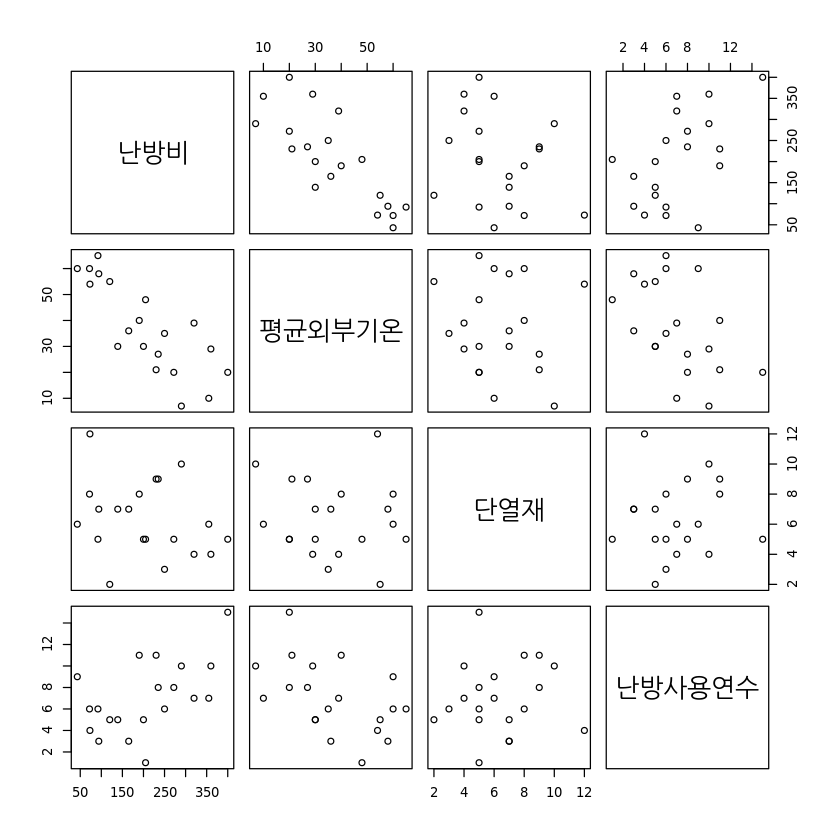

In [9]:
# 독립변수 : 평균외부기온, 단열재, 난방사용연수
# 종속변수 : 난방비 

plot(houses)

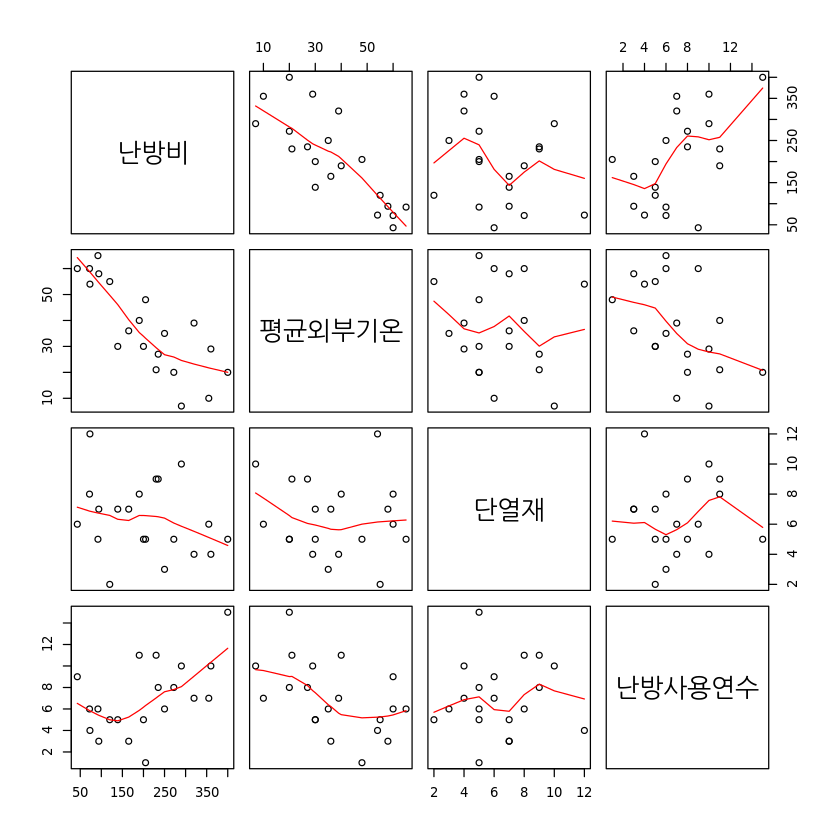

In [10]:
# 시각화
pairs(houses, panel=panel.smooth)

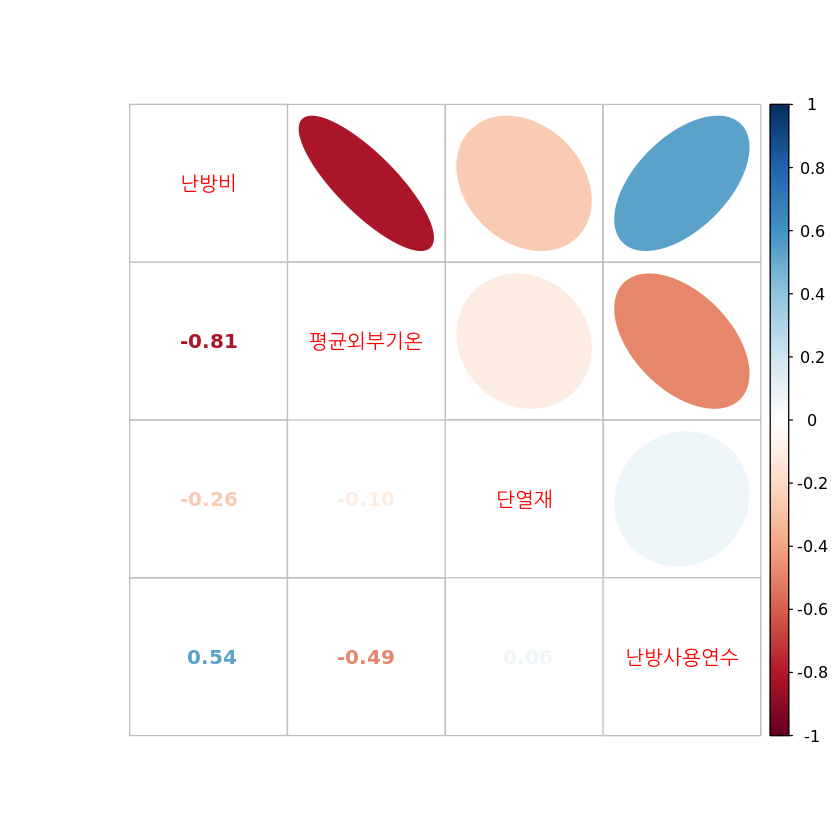

In [11]:
# 상관계수 시각화
library(corrplot)
cor <- cor(houses)
corrplot.mixed(cor, upper='ellipse', lower='number')

In [12]:
# 난방비와 관련있는 변수 : 평균외부기온, 난방사용연수


In [13]:
# 다중회귀모델 생성
# lm(종속변수~독립변수+독립변수+독립변수, data=객체)
# lm(종속변수~ ., data=객체)

m1 <- lm(houses$난방비 ~ houses$평균외부기온+houses$단열재 + houses$난방사용연수)
m1




Call:
lm(formula = houses$난방비 ~ houses$평균외부기온 + houses$단열재 + 
    houses$난방사용연수)

Coefficients:
        (Intercept)  houses$평균외부기온        houses$단열재  
            427.194               -4.583              -14.831  
houses$난방사용연수  
              6.101  


In [14]:
m2 <- lm(난방비~평균외부기온+단열재+난방사용연수, data=houses)
m2


Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [15]:
m3 <- lm(난방비~. ,data=houses)
m3


Call:
lm(formula = 난방비 ~ ., data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [16]:
# m2 
# y = -4.58x1 + -14.83x2 + 6.1x3 + 427.19
# 외부기온이 1도 증가 -> 난방비는 -4.5씩 줄어듬
# 단열재를 1mm씩 증가 -> 난방비는 -14.8씩 줄어듬
# 난방사용연수가 1년씩 증가 -> 난방비는 6.1씩 증가

# 만일, 기온30도, 단열재 두깨가 5mm, 난방기연수가 10년된 주택의 예상 난방비는?

In [17]:
-4.58*30 + -14.83*5 + 6.1*10 + 427.19

[1] 276.64

In [18]:
# 회귀모델의 회귀계수 : coef
coef(m2)

(Intercept) 평균외부기온       단열재 난방사용연수 
  427.193803    -4.582663   -14.830863     6.101032

In [19]:
# 회귀모델 예측 : predict
# predict(모델변수, 예측유형, 입력값)
inputs <- data.frame(평균외부기온=c(30), 단열재=c(5), 난방사용연수=c(10))

predict(m2, newdata=inputs) # 예측값

1 
276.5699

In [20]:
predict(m2, interval='prediction', newdata=inputs) # 신뢰구간 기반 예측

,fit,lwr,upr
1,276.5699,162.4705,390.6693


In [21]:
# ex) 어떤 은행에서 담보주택관련 분석을 위해
# 주택가격, 세대주, 교육수준, 세대주 연령, 월 상환액, 세대주 성별등이
# 가계소득 수준과 어떤 관련이 있는지 회귀분석을 실시(banks.txt)

In [22]:
banks <- read.csv('csv/banks.txt', sep='\t')
head(banks)

,Income,Value,Education,Age,Mortgage,Gender
,<dbl>,<int>,<int>,<int>,<int>,<int>
1,100.7,190,14,53,230,1
2,99.0,121,15,49,370,1
3,102.0,161,14,44,397,1
4,100.7,161,14,39,181,1
5,100.0,179,14,53,378,0
6,95.2,99,14,46,304,0


In [23]:
m1 <- lm(Value~. , data=banks)
m1


Call:
lm(formula = Value ~ ., data = banks)

Coefficients:
(Intercept)       Income    Education          Age     Mortgage       Gender  
 -543.78676      8.84397    -19.57426      1.89771      0.04048    -12.28484  


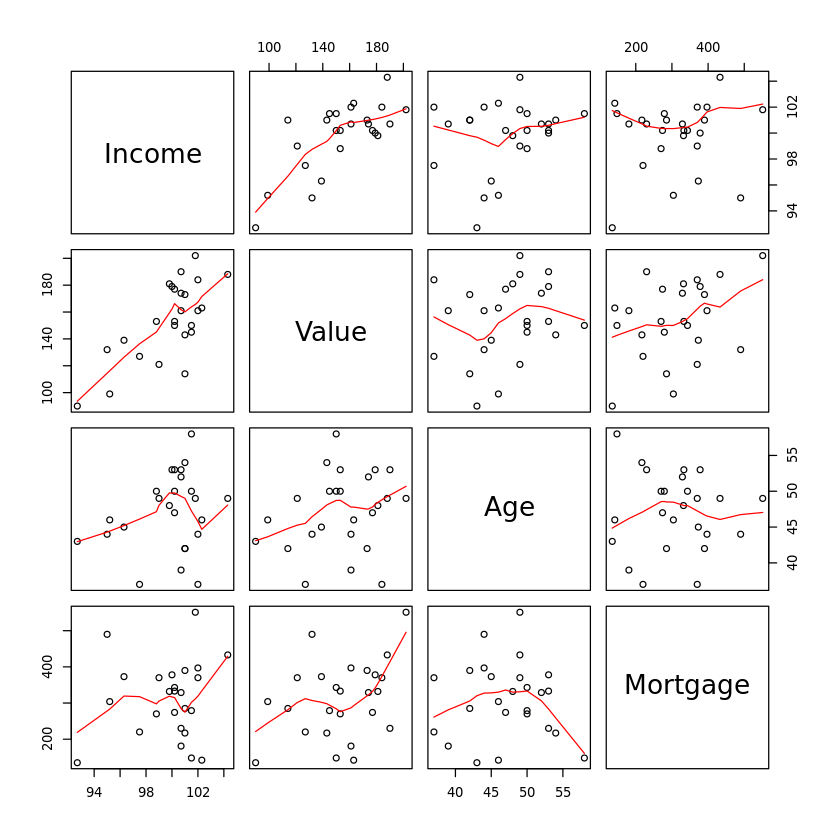

In [24]:
bank <- banks[, c(1,2,4,5)]
pairs(bank, panel=panel.smooth)

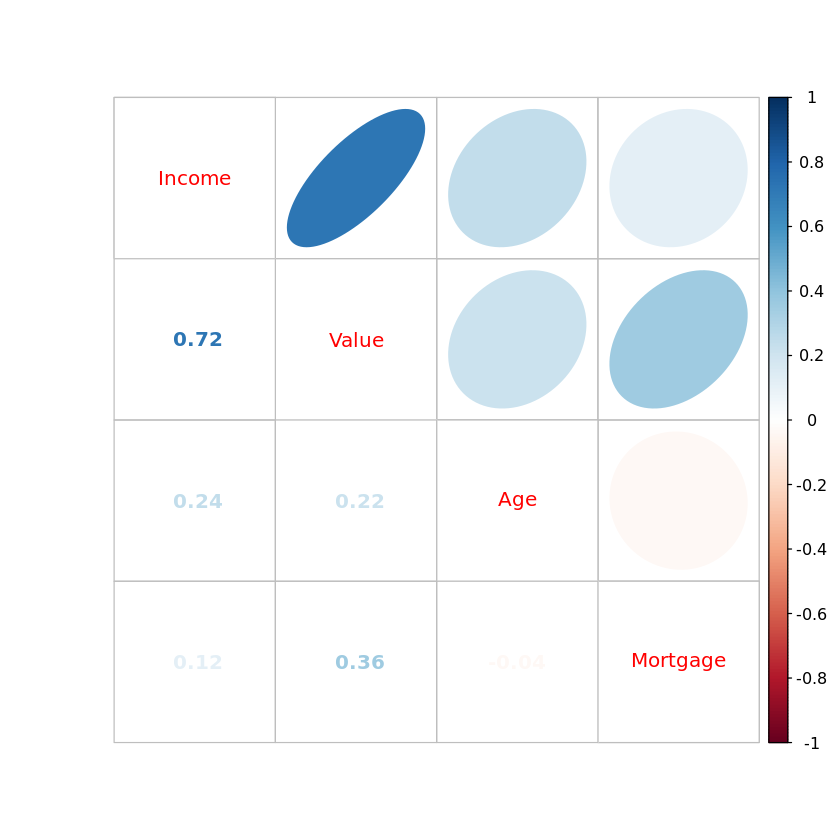

In [25]:
library(corrplot)
cor <- cor(bank)
corrplot.mixed(cor, upper='ellipse', lower='number')

In [26]:
model <- lm(Income~Value+Age+Mortgage, bank)
coef(model)

# y = 0.07x1 + 0.03x2 - 0.003x3 + 88.69

(Intercept)        Value          Age     Mortgage 
88.687414203  0.069438669  0.033873198 -0.003733621

In [27]:
summary(model)
# 결정계수 0.5461
# 유의성 검정 : pvalue 0.0007242
# 유의성 검정 : Pr(>|t|) = 0.0007242

# y = 0.07x1 + 88.69


Call:
lm(formula = Income ~ Value + Age + Mortgage, data = bank)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1894 -1.3471  0.1877  1.2661  4.0380 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.687414   3.770847  23.519  < 2e-16 ***
Value        0.069439   0.014873   4.669 0.000131 ***
Age          0.033873   0.074430   0.455 0.653706    
Mortgage    -0.003734   0.003969  -0.941 0.357542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 21 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.4812 
F-statistic: 8.422 on 3 and 21 DF,  p-value: 0.0007242


In [28]:
# 난방비 가이드 라인 작성을 위해 다중회귀분석을 실시함.
# 다중회귀모형 작성시 적잘한 필요조건을 만족했는지 확인

m <- lm(난방비~. ,houses)

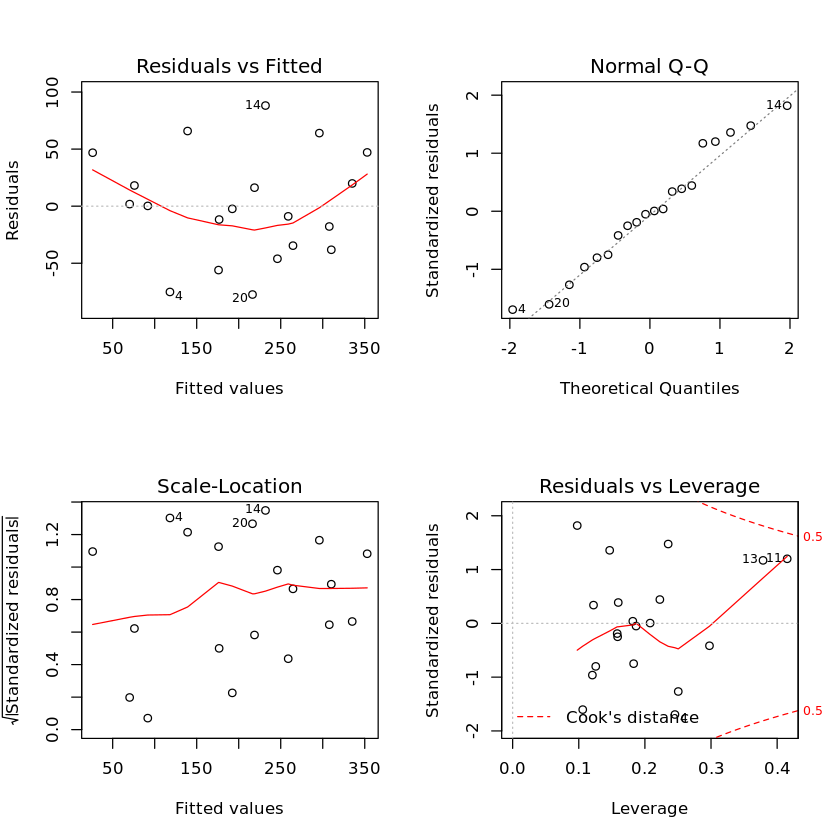

In [29]:
# 2x2 그래프를 그리기 위한 초기화
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))

plot(m) # 회귀모형을 분석한 4개의 그래프가 나타남
par(.opar)

#### 회귀모형 적합성 그래프
#### 시간방향으로 선형성/정규성/분산성/독립성을 의미

1) 선형성 : 잔차 예측비교도
    - 잔차를 표준화 시켜서 정규분포를 따르는지 확인
2) 정규성 : 
    - 독립변수가 정규성을 띄면 잔차도 정규성을 띄는가
3) 분산성 : 잔차 분산 비교도
    - 독립변수의 분산이 일정하면 잔차의 분산도 일정한가
4) 독립성 : 잔차의 영향력 
    - 회귀방정식의 계수결정에 불균형한 영향을 미치는 독립변수(이상치) 존재 파악

In [30]:
summary(m)
# 결정계수는 0.8042
# 수정된 결정계수 0.7675
# 회귀모형은 몇몇의 이상치때문에 정규성, 독립성에 문제가 있는것으로 보임


Call:
lm(formula = 난방비 ~ ., data = houses)

Residuals:
    Min      1Q  Median      3Q     Max 
-77.403 -35.492  -1.062  26.642  88.146 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept)  427.1938    59.6014   7.168 2.24e-06 ***
평균외부기온  -4.5827     0.7723  -5.934 2.10e-05 ***
단열재       -14.8309     4.7544  -3.119  0.00661 ** 
난방사용연수   6.1010     4.0121   1.521  0.14786    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 51.05 on 16 degrees of freedom
Multiple R-squared:  0.8042,	Adjusted R-squared:  0.7675 
F-statistic:  21.9 on 3 and 16 DF,  p-value: 6.562e-06


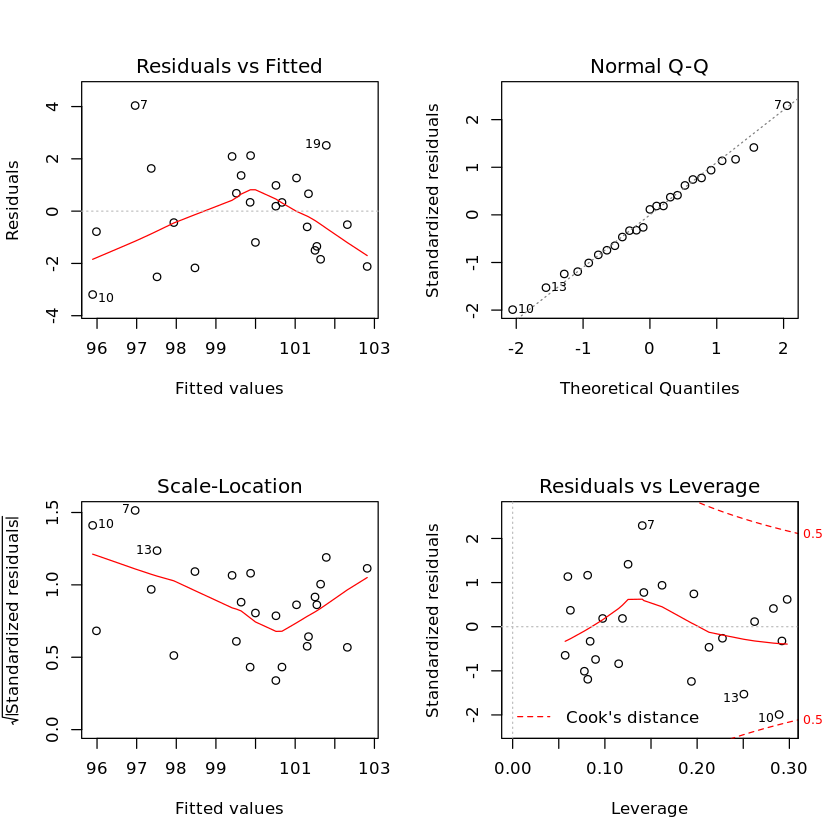

In [31]:
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))

plot(model) # 회귀모형을 분석한 4개의 그래프가 나타남
par(.opar)

In [32]:
summary(model)
# 수정된 결정계수 : 0.4812 모델의 결정력은 많이 낮음
# 회귀계수는 Value만 포함하고 나머지는 제외
# 회귀모형 적합성은 몇몇의 이상치때문에 선형성, 분산성, 독립성에 문제가 있는것으로 보임


Call:
lm(formula = Income ~ Value + Age + Mortgage, data = bank)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1894 -1.3471  0.1877  1.2661  4.0380 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.687414   3.770847  23.519  < 2e-16 ***
Value        0.069439   0.014873   4.669 0.000131 ***
Age          0.033873   0.074430   0.455 0.653706    
Mortgage    -0.003734   0.003969  -0.941 0.357542    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.9 on 21 degrees of freedom
Multiple R-squared:  0.5461,	Adjusted R-squared:  0.4812 
F-statistic: 8.422 on 3 and 21 DF,  p-value: 0.0007242


In [33]:
# 미술수집가는 그림의 낙찰가격과 입찰자수, 보존연수와의 관계를 알아보자고 함
# 독립변수와 종속변수간엥 어떤 관련이 있는지 회귀분석과 적합성여부를 실시

art <- read.csv('csv/artsbuyer.txt', sep='\t')
head(art)

,Painting,Price,Bidders,Age
,<int>,<int>,<int>,<int>
1,1,3470,10,67
2,2,3500,8,56
3,3,3700,7,73
4,4,3860,4,71
5,5,3920,12,99
6,6,3900,10,87


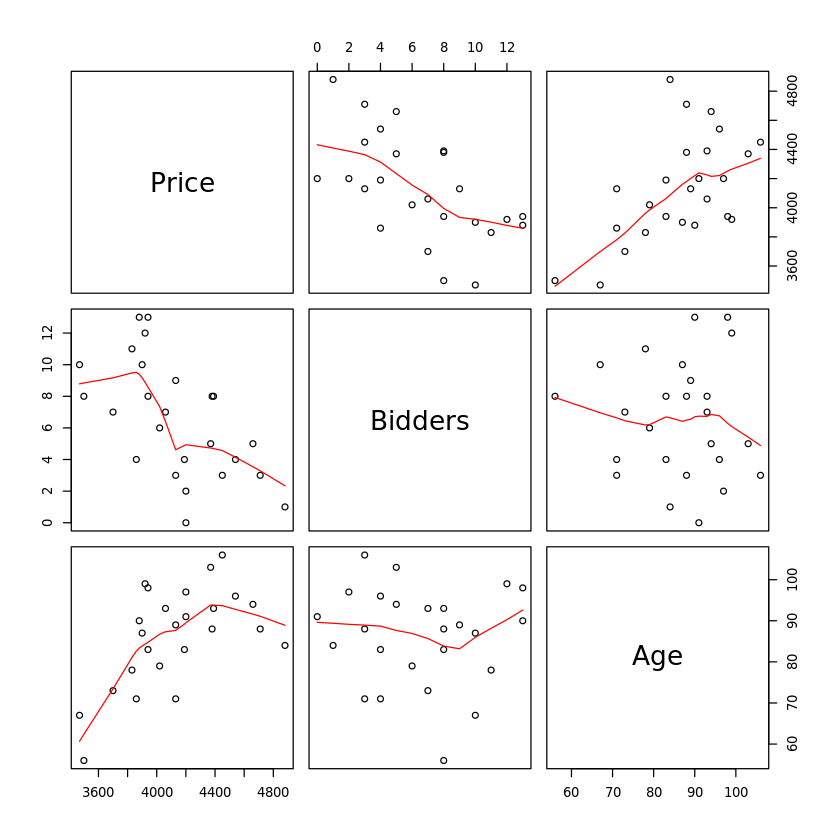

In [34]:
arts <- art[,2:4]
pairs(arts, panel=panel.smooth)

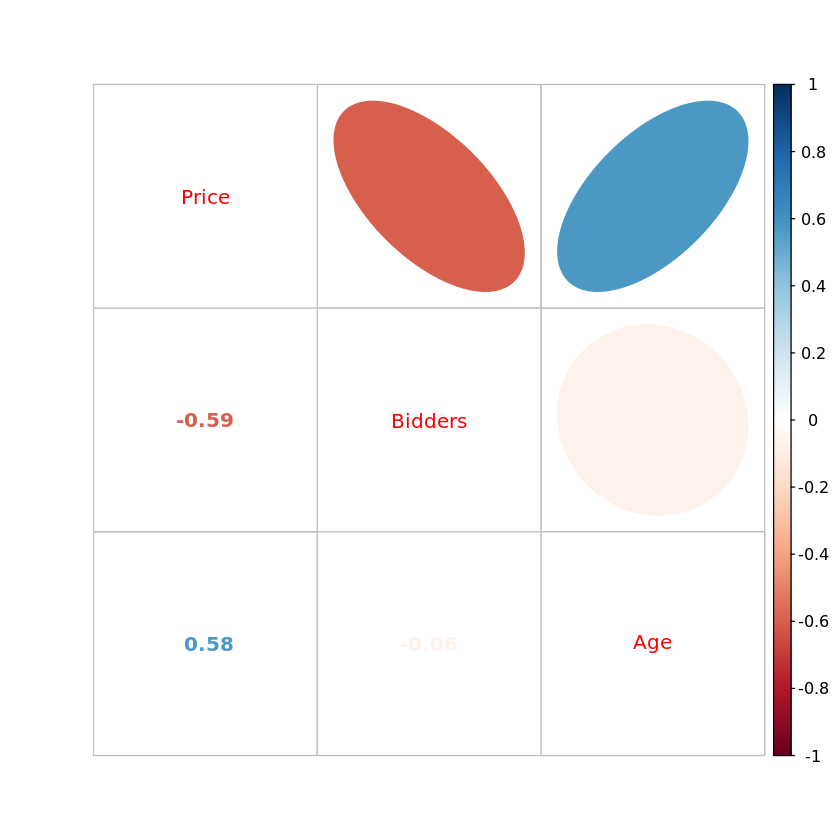

In [35]:
# 상관계수
cor <- cor(arts)
corrplot.mixed(cor, upper='ellipse', lower='number')

In [36]:
m <- lm(Price~., arts)

coef(m)

summary(m)
# 수정된 결정계수 : 0.6158
# p-value : 1.034e-05
# Pr(>|t|)
# y = 54.19 bid + 16.29 age + 3080

(Intercept)     Bidders         Age 
 3080.05304   -54.18854    16.28910


Call:
lm(formula = Price ~ ., data = arts)

Residuals:
    Min      1Q  Median      3Q     Max 
-362.36 -155.62  -31.93   87.91  485.85 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 3080.053    343.885   8.957 8.62e-09 ***
Bidders      -54.189     12.281  -4.412 0.000220 ***
Age           16.289      3.784   4.305 0.000287 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 222.1 on 22 degrees of freedom
Multiple R-squared:  0.6478,	Adjusted R-squared:  0.6158 
F-statistic: 20.23 on 2 and 22 DF,  p-value: 1.034e-05


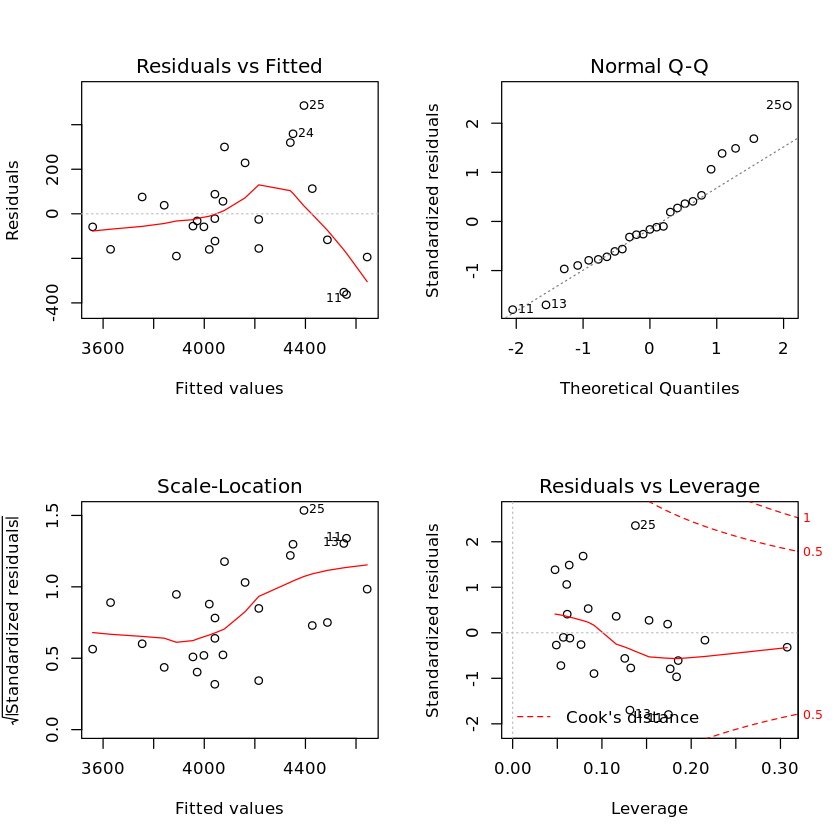

In [37]:
# 회귀모델의 적합성 확인
# 시간방향으로 선형성/정규성/분산성/독립성
.opar <- par(no.readonly=T)
par(mfrow = c(2,2))

plot(m)
par(.opar)

# 회귀모형 적합성은 몇몇의 이상치때문에 선형성,정규성,분산성,독립성에 문제가 있는것으로 보임

## 다중공선성
* 회귀분석시 종속변수와 독립변수간의 상관여부를 판단했었는데, 간혹 독립변수들끼리 서로 상관되는 경우가 발생
* 서로 비슷한 성격을 가지는 독립변수들이 존재할때 주로 발생
* => '다중공선성'의 문제라고 말함
* 대학교 합격 여부를 예측하기 위해, 고등학교 성적과 석차를 사용하는 경우
* 두 독립변수간의 상관계수가 -0.7~0.7사이면 사용해도 좋음
* 다중공선성 여부를 파악하려면 팽창계수를 알아봐야 함
    + 팽창계수가 10이상이면 해당 독립변수는 제외시킴
* r에서는 car패키지의 vif함수를 사용

In [38]:
# ex) 시멘트가 굳어지며 발생하는 열의 양에 영향을 미치는 4가지 성분에 대해 회귀분석 실시
# cement.txt


In [39]:
x1 <- c(7, 1, 11, 11, 7, 11, 3, 1, 2, 21, 1, 11, 10)
x2 <- c(26, 29, 56, 31, 52, 55, 71, 31, 54, 47, 40, 66, 68)
x3 <- c(6, 15, 8, 8, 6, 9, 17, 22, 18, 4, 23, 9, 8)
x4 <- c(60, 52, 20, 47, 33, 22, 6, 44, 22, 26, 34, 12, 12)

y <- c(78.5, 74.3, 104.3, 87.6, 95.9, 109.2, 102.7, 
        72.5, 93.1, 115.9, 83.8, 113.3, 109.4)

cement <- data.frame(x1,x2,x3,x4,y)
head(cement)

,x1,x2,x3,x4,y
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,7,26,6,60,78.5
2,1,29,15,52,74.3
3,11,56,8,20,104.3
4,11,31,8,47,87.6
5,7,52,6,33,95.9
6,11,55,9,22,109.2


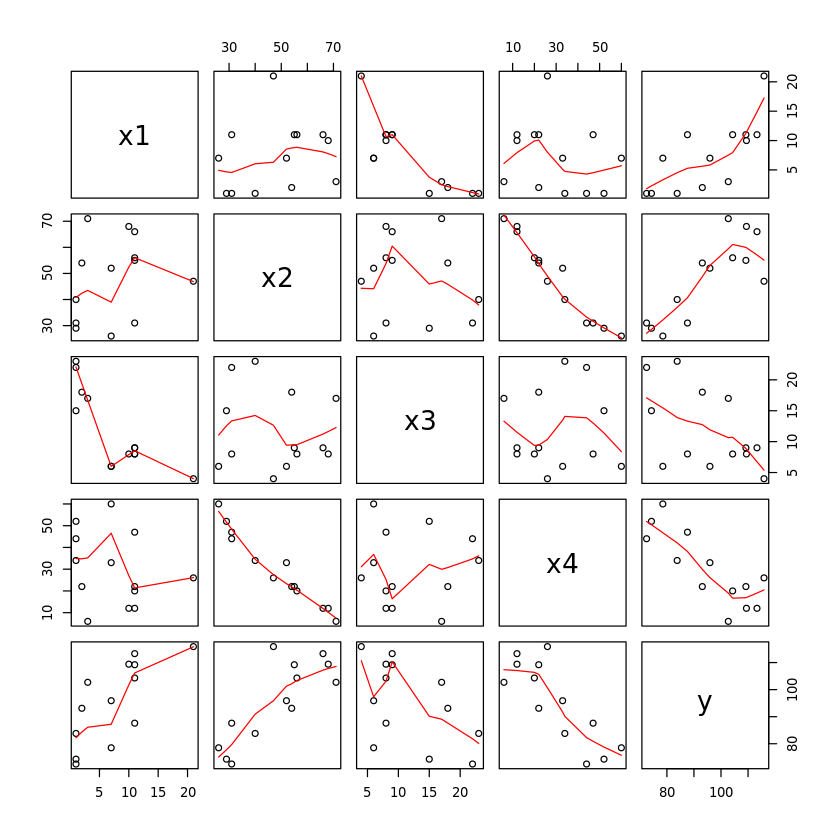

In [40]:
pairs(cement, panel=panel.smooth)

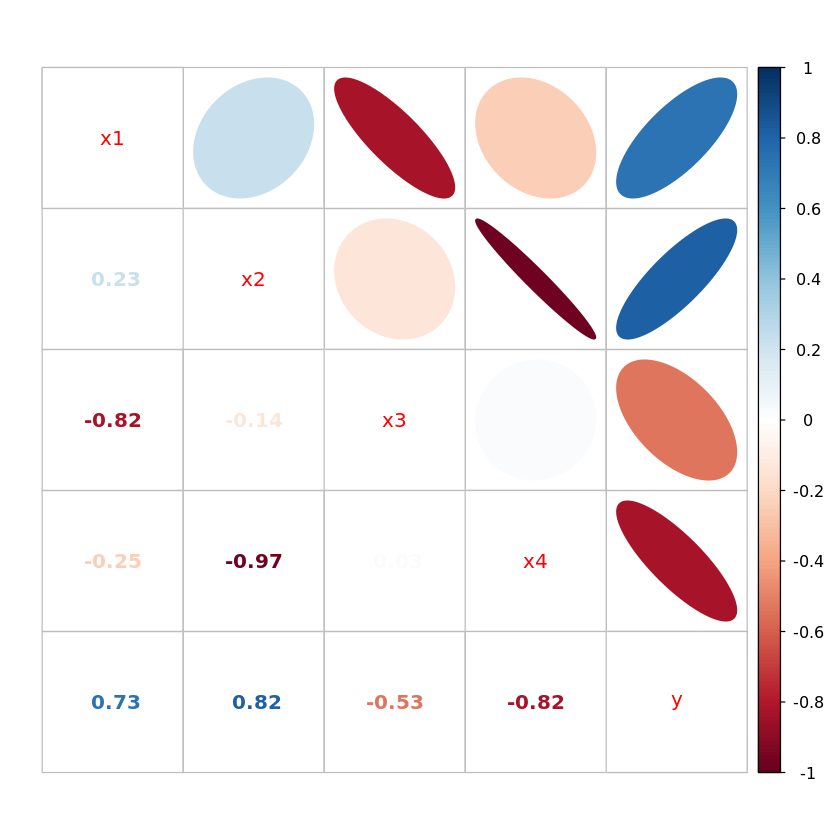

In [41]:
cor <- cor(cement)
corrplot.mixed(cor, upper='ellipse', lower='number')

In [42]:
m <- lm(y~. ,cement)
coef(m)

summary(m)
# 수정된 결정계수 : 0.9736
# p-value : 4.756e-07
# Pr(>|t|) : 유의미한 회귀계수 없음
# -> 다중공선성이 원인일 수 있음

(Intercept)          x1          x2          x3          x4 
 62.4053693   1.5511026   0.5101676   0.1019094  -0.1440610


Call:
lm(formula = y ~ ., data = cement)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.1750 -1.6709  0.2508  1.3783  3.9254 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)  
(Intercept)  62.4054    70.0710   0.891   0.3991  
x1            1.5511     0.7448   2.083   0.0708 .
x2            0.5102     0.7238   0.705   0.5009  
x3            0.1019     0.7547   0.135   0.8959  
x4           -0.1441     0.7091  -0.203   0.8441  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.446 on 8 degrees of freedom
Multiple R-squared:  0.9824,	Adjusted R-squared:  0.9736 
F-statistic: 111.5 on 4 and 8 DF,  p-value: 4.756e-07


In [43]:
# install.packages('car')
# library(car)
# vif(m)


In [44]:
# install.packages('car')   # 터미널에서 설치
# library(car)

# vif(m)
# x1 38.49, x2 254.42, x3 46.86, x4 282.51
# x1, x3의 팽창계수가 x2, x4 팽창계수보다 작음
# m2 <- lm(y ~ x1+x3)  # x1, x3
# summary(m2)
# m3 <- lm(y ~ x2+x4)  # x2, x4
# summary(m3)
# m4 <- lm(y ~ x1+x2)  # x1, x2 (!!)
# summary(m4)
# m5 <- lm(y ~ x3+x4)  # x3, x4  (!!)
# summary(m5)
# m6 <- lm(y ~ x1+x2+x3)  # x1, x2, x3
# summary(m6)
# 결론 : x1,x2,x3,x4를 이용해서 회귀분석을 하는 것보다는
# 다중공선성을 최소로 하는 변수들만 선택해서 분석하는 것이
# 회귀모형의 유의성을 보장하는데 도움이 됨

In [45]:
# ex) 자동차 부품도매상 관리자는 각 지역의 연매출액을 추정하려 한다
# 지역내 아웃렛수, 차량등록수, 개인 총소득, 자동차 사용년수, 매니저수 등이 총매출에
# 어떤 영향을 주는지 회귀분석을 실시 (carparts.txt)

In [46]:
car <- read.csv('csv/carparts.txt', sep='\t')
head(car)

,sales,outlet,users,income,year,manager
,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>
1,37.702,"1,739",9.27,85.4,3.5,9
2,24.196,"1,224",5.86,60.7,5.0,5
3,32.055,"1,846",8.81,68.1,4.4,7
4,3.611,120,3.81,20.2,4.0,5
5,17.625,"1,096",10.31,33.8,3.5,7
6,45.919,"2,290",11.62,95.1,4.1,13


In [51]:
car$outlet <- as.character(car$outlet)
car$outlet <- gsub(',', '', car$outlet)
car$outlet <- as.integer(car$outlet)

In [52]:
head(car)

,sales,outlet,users,income,year,manager
,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
1,37.702,1739,9.27,85.4,3.5,9
2,24.196,1224,5.86,60.7,5.0,5
3,32.055,1846,8.81,68.1,4.4,7
4,3.611,120,3.81,20.2,4.0,5
5,17.625,1096,10.31,33.8,3.5,7
6,45.919,2290,11.62,95.1,4.1,13


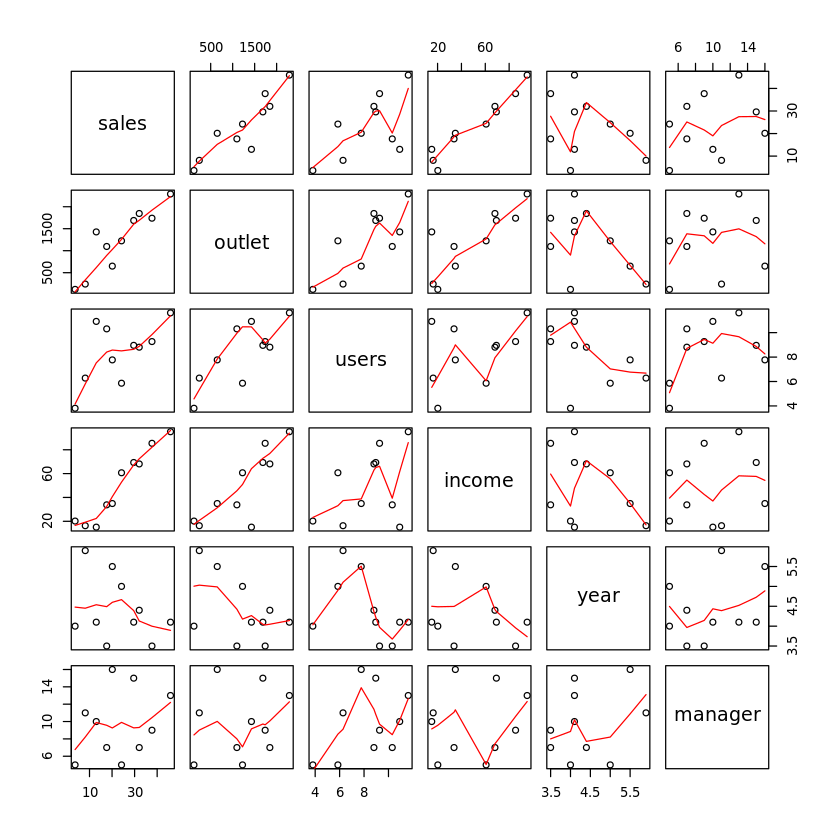

In [48]:
pairs(car, panel=panel.smooth)

In [49]:
library(corrplot)
cor <- cor(car)
corrplot.mixed(car, upper='ellipse', lower='number')


ERROR: Error in corrplot(corr, type = "upper", method = upper, diag = TRUE, tl.pos = tl.pos, : The matrix is not in [-1, 1]!


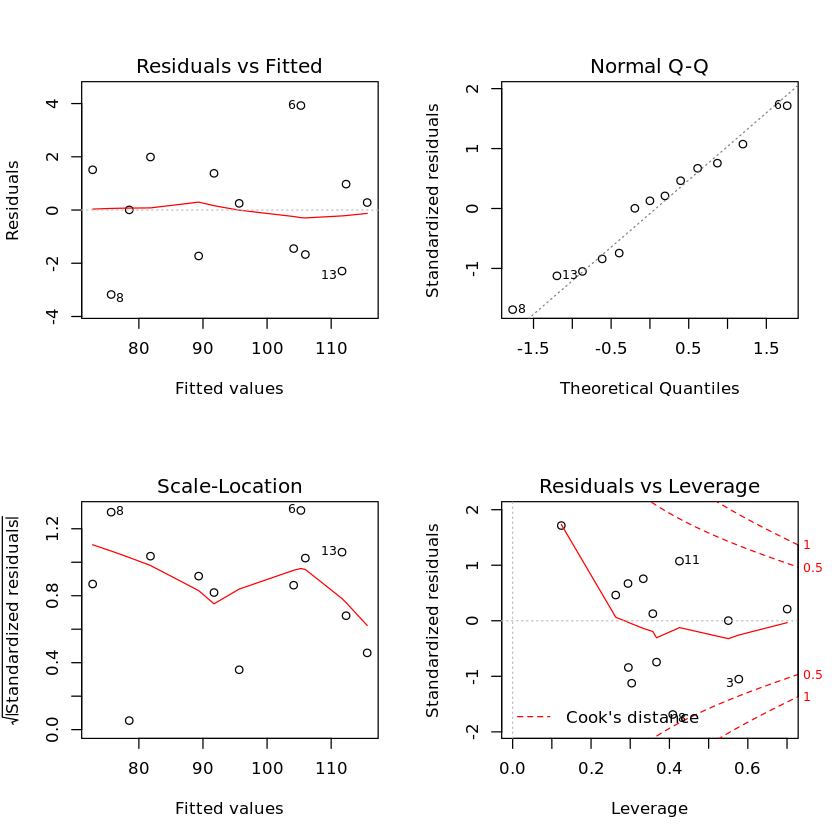

In [50]:
.opar <- par(no.readonly=T)
par(mfrow=c(2,2))
plot(m)
par(.opar)

In [ ]:
car2 <- car[, c(1, 3:6)]

In [ ]:
m2 <- lm(sales~. , car2)
summary(m2)


In [ ]:
car3 <- car[, c(1:4)]
m3 <- lm(sales~. ,car3)
summary(,3

## 독립변수 최적화
* 독립변수가 많을때 유의한 계수를 포함시키고 유의하지 않은 계수는 제외시켜
* 작성한 회귀방정식은 간단해지고 이해하기도 쉬워짐
* 가능하다면 적은 수의 독립변수를 포함하는것이 좋음


## 변수소거법
* 다중회귀식에 포함할 수 있는 독립변수들을 효과적으로 선별할 수 있는 분석방법
* 단계적 회귀법, 단계적 변수 선택법
    - 전진소거법, 후진소거법, 최적소거법
* 전진소거법 : 중요도가 높은 변수를 하나씩 추가해가며 회귀식을 작성
* 후진소거법 : 중요도가 낮은 변수를 하나씩 제거해가며 회귀식을 작성
* 최적소거법 : 전진/후진 소거법을 적절히 조합
* 이렇게 변수를 하니씩 추가/제거 해가며 유의미한 독립변수를 찾는 것은 다소 불편
* 더구나 변수의 갯수가 많아지면 시간도 많이 걸림
    - step 함수를 이용하면 간편하게 해결 가능
    - step(회귀모델, 변수범위, 소거종류)
* 소거법을 이용해서 만들어진 회귀모형에 대한 성능평가는 AIC를 이용
    - Akaike Information Criterion
    - AIC 값이 작으면 적절한 모형임을 의미

In [54]:
# 전진소거
# step(회귀모델, 변수범위, 소거종류)
step(lm(난방비~1, data=houses), scope=list(lower=~1,upper=~평균외부기온+단열재+난방사용연수), direction='forward')

Start:  AIC=187.46
난방비 ~ 1

               Df Sum of Sq    RSS    AIC
+ 평균외부기온  1    140215  72701 167.97
+ 난방사용연수  1     61336 151580 182.66
<none>                      212916 187.46
+ 단열재        1     14074 198842 188.09

Step:  AIC=167.97
난방비 ~ 평균외부기온

               Df Sum of Sq   RSS    AIC
+ 단열재        1   24979.6 47721 161.55
<none>                      72701 167.97
+ 난방사용연수  1    5648.1 67053 168.35

Step:  AIC=161.55
난방비 ~ 평균외부기온 + 단열재

               Df Sum of Sq   RSS    AIC
+ 난방사용연수  1      6026 41695 160.85
<none>                      47721 161.55

Step:  AIC=160.85
난방비 ~ 평균외부기온 + 단열재 + 난방사용연수




Call:
lm(formula = 난방비 ~ 평균외부기온 + 단열재 + 난방사용연수, 
    data = houses)

Coefficients:
 (Intercept)  평균외부기온        단열재  난방사용연수  
     427.194        -4.583       -14.831         6.101  


In [56]:
# step 함수 결과 : 평균외부기온 + 단열재 + 난방사용연수
# 난방사용연수를 포함시켰을때 AIC의 극적변화는 미비 제외가능 

summary(lm(난방비~. , data=houses)

ERROR: Error in parse(text = x, srcfile = src): <text>:5:0: unexpected end of input
3: 
4: summary(lm(난방비~. , data=houses)
  ^


In [1]:
library(car)

ERROR: Error in library(car): there is no package called ‘car’


## 독립변수 제거를 위한 또 다른 방법
* regsubsets : n개의 변수가 있을때 각 변수를 더하거나 빼서 2n개의 모델을 만들어 적절한 회귀모델을 생성해줌
* regsubsets 함수를 이용해서 회귀모델의 성능을 평가할때의 척도는 BIC를 이용

In [2]:
library(leaps)

In [4]:
m <- regsubsets(난방비~., houses, method='exhaustive')

In [5]:
summary(m)

Subset selection object
Call: regsubsets.formula(난방비 ~ ., houses, method = "exhaustive")
3 Variables  (and intercept)
             Forced in Forced out
평균외부기온     FALSE      FALSE
단열재           FALSE      FALSE
난방사용연수     FALSE      FALSE
1 subsets of each size up to 3
Selection Algorithm: exhaustive
         평균외부기온 단열재 난방사용연수
1  ( 1 ) "*"          " "    " "         
2  ( 1 ) "*"          "*"    " "         
3  ( 1 ) "*"          "*"    "*"         

In [6]:
summary(m)$bic

[1] -15.49942 -20.92321 -20.62724

In [7]:
summary(m)$adjr2

[1] 0.6395770 0.7494996 0.7674520

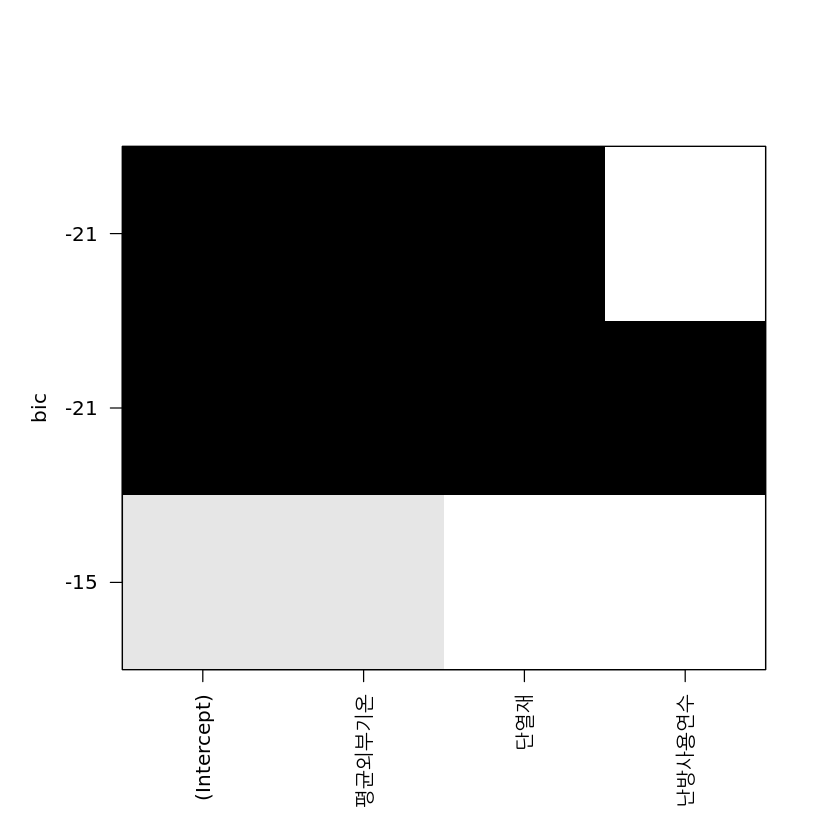

In [8]:
plot(m, scale='bic')

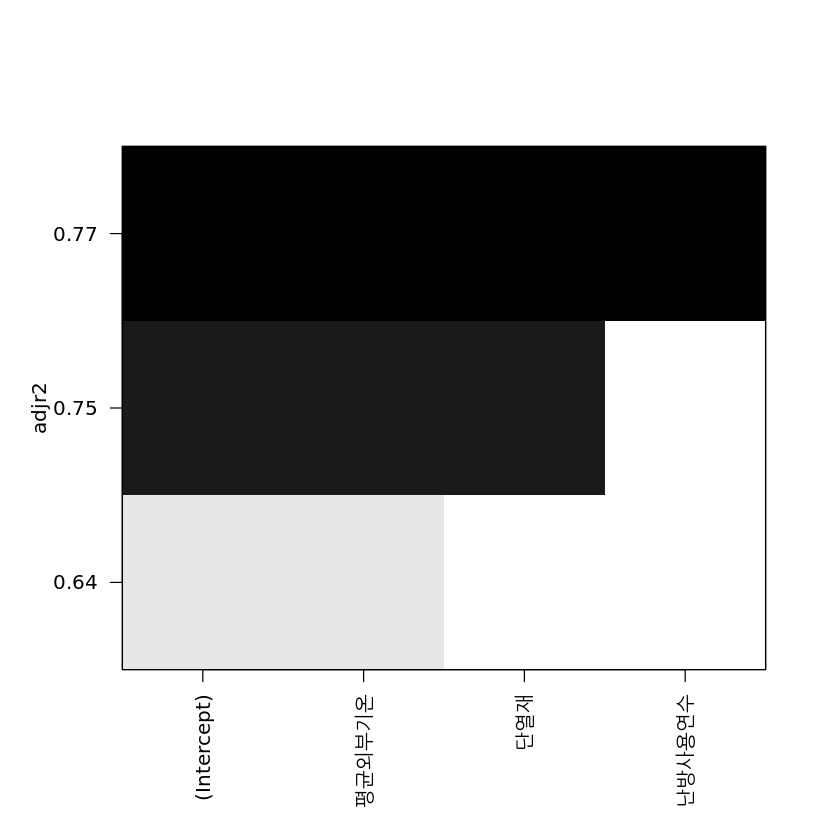

In [10]:
plot(m, scale='adjr2')

In [ ]:
# Boston 회귀모형을 regsubsets함수를 이용해서 분석